In [43]:
#THIS IS SHAN'S BRANCH
import pandas as pd
import matplotlib.pyplot as plt

path1='../Cleaned_Data/Clearned_Original_Data'
path2='../Cleaned_Data/Original_Data_That_Contains_Critic_rating_Only'
path3='../Cleaned_Data/Original_Data_That_Contains_User_info_Only'

In [44]:
Odf=pd.read_csv(path1)
Cdf=pd.read_csv(path2)
Udf=pd.read_csv(path3)

In [45]:
Odf=Odf[['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales','Global_Sales']]
Odf=Odf.dropna(how='any')
Odf['Year_of_Release']=Odf['Year_of_Release'].astype(int)
Odf.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,31.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),


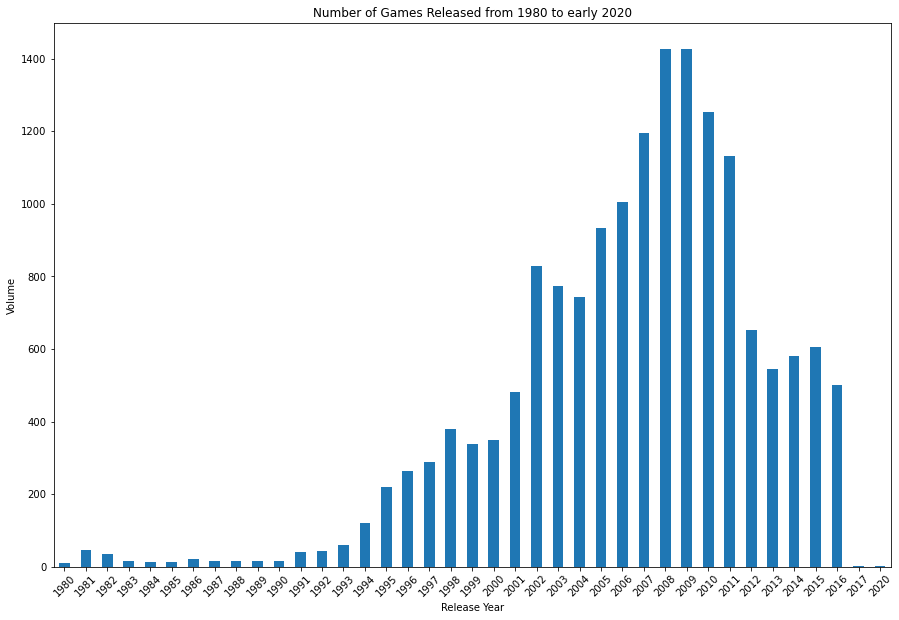

In [46]:

#Summary
Grouped=Odf.groupby('Year_of_Release')['Name'].count()
Grouped.plot(kind='bar',figsize=(15,10),xlabel='Release Year',ylabel='Volume',title='Number of Games Released from 1980 to early 2020')
plt.xticks(rotation=45)

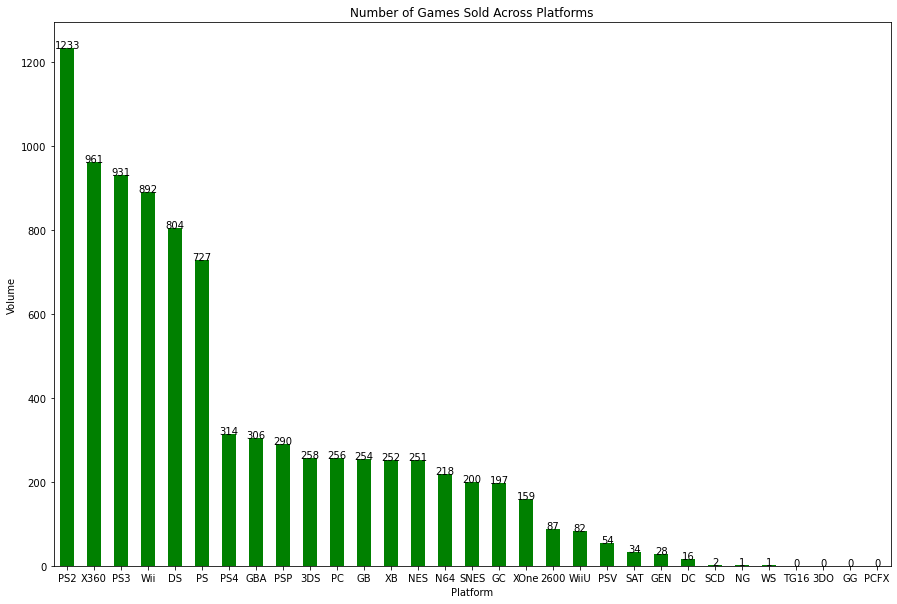

In [47]:
#Global Sale Across Platform
Grouped_Plat=Odf.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
Grouped_Plat.plot(kind='bar',figsize=(15,10),xlabel='Platform',ylabel='Volume',title='Number of Games Sold Across Platforms',color='g')
y=Grouped_Plat.to_list()
plt.xticks(rotation=0)

for i in range(len(Odf['Platform'].unique())):
        plt.text(i, y[i], round(y[i]), ha = 'center')

In [48]:
#Get Platform Life Span
grouped_Plat=Odf.groupby('Platform')
platform_Life=grouped_Plat['Year_of_Release'].value_counts()

platform=[]
life=[]
for index in platform_Life.items():
     if index[0][0] in platform:
         life[platform.index(index[0][0])]+=1
     else:
         platform.append(index[0][0])
         life.append(0)

plat_life=pd.DataFrame({'Platform':platform,'Total Life':life})
plat_life=plat_life.sort_values(by='Total Life')
max_life=plat_life['Total Life'].max()
min_life=plat_life['Total Life'].min()
avg_life=plat_life['Total Life'].mean()
plat_life


,Platform,Total Life
9,GG,0
14,PCFX,0
24,TG16,0
1,3DO,1
22,SCD,1
25,WS,2
12,NG,3
30,XOne,3
8,GEN,4
18,PS4,4


In [62]:
#Get More Recent Data
Recent_df=Odf.loc[Odf['Year_of_Release']>1999]
plat_df=pd.crosstab(Recent_df['Platform'], Recent_df['Year_of_Release'],margins=True, margins_name="total").sort_values(by='total', ascending=False)
plat_df


Year_of_Release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,total
Platform,,,,,,,,,,,,,,,,,,,,
total,350,482,829,775,743,934,1006,1196,1427,1426,1253,1133,653,544,581,606,500,3,1,14442
PS2,82,185,280,256,259,260,259,214,191,96,38,7,0,0,0,0,0,0,0,2127
DS,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,0,1,2121
PS3,0,0,0,0,0,0,27,90,138,162,181,215,148,126,108,73,38,0,0,1306
Wii,0,0,0,0,0,0,44,185,282,325,253,143,31,12,6,4,1,0,0,1286
X360,0,0,0,0,0,18,93,123,146,172,182,206,106,75,63,35,13,0,0,1232
PSP,0,0,0,0,15,95,189,133,100,161,188,139,106,54,10,3,0,0,0,1193
PC,7,15,19,33,30,37,52,62,76,107,88,136,61,38,47,50,54,0,0,912
XB,1,33,158,189,177,179,62,3,1,0,0,0,0,0,0,0,0,0,0,803


In [50]:
glob_by_plat=grouped_Plat['Global_Sales'].sum().to_frame('Global_Sales')
glob_by_plat=glob_by_plat.sort_values(by='Global_Sales')
sum_pd=pd.merge(plat_life,glob_by_plat,on='Platform')
sum_pd

,Platform,Total Life,Global_Sales
0,GG,0,0.04
1,PCFX,0,0.03
2,TG16,0,0.16
3,3DO,1,0.10
4,SCD,1,1.87
5,WS,2,1.42
6,NG,3,1.44
7,XOne,3,159.44
8,GEN,4,28.36
9,PS4,4,314.23


<AxesSubplot:title={'center':'Total Global Sale vs Platform Life'}, xlabel='Total Life', ylabel='Global_Sales'>

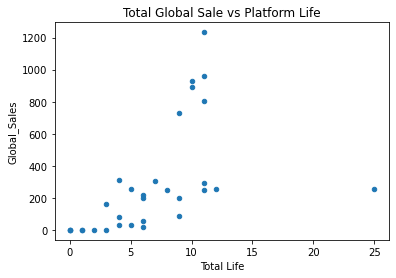

In [53]:
#Do a scatter plot between total life and global sale
sum_pd.plot(x='Total Life',y='Global_Sales',kind='scatter',title='Total Global Sale vs Platform Life',xlabel='Platform Life',ylabel='Global Sale')